In [1]:
import numpy as np
import matplotlib.pyplot as plt
from EDnosym import operator
from scipy.special import binom, erf

# Exercise 2: Many-body spectrum and thermodynamics

The off-diagonal matrix elements in the eigenstate thermalization hypothesis depend on a quantity called the thermodynamic entropy $S(E)$. In this exercise, we will analyse this quantity, and other thermodynamic properties of a many-body spectrum.

## Computing the many-body spectrum

We consider the same model studied in Exercise 1, namely, the mixed-field quantum Ising chain:
\begin{equation}
H=\sum_{j=0}^{L-1} (-JZ_j Z_{j+1}-gX_j-hZ_j).
\end{equation}

In [2]:
X = np.array([[0,1],\
              [1,0]])
Z = np.array([[1,0],\
              [0,-1]])

In [3]:
J, g, h = 1, 0.9045, 0.890 # Hamiltonian parameters

We analyse the spectrum for different system sizes. Let's start by computing the spectra (as we did in Exercise 1), and storing them in a dictionary for easy reference.

In [4]:
spectra = {}
for L in [6, 8, 10, 12]:
    H = -J*sum([operator(sites = [j,(j+1)%L], matrices = [Z, Z], L = L) for j in range(L)])
    H += -g*sum([operator(sites = [j], matrices = [X], L = L) for j in range(L)])
    H += -h*sum([operator(sites = [j], matrices = [Z], L = L) for j in range(L)])
    Hdense = H.toarray()
    spectra[L] = np.linalg.eigvalsh(Hdense)

## Density of states

The density of states is defined as
\begin{equation}
\rho(E)=\sum_{n=1}^D \delta(E-E_n).
\end{equation}
where $D=2^L$ is the Hilbert space dimension.
It is often useful to consider the number $N(E)$ of eigenstates with energy less than $E$. For large systems, this becomes a smooth function, and the density of states can be equivalently defined as
\begin{equation}
\rho(E) \propto \frac{d N(E)}{dE}.
\end{equation}

Plot the function $N(E)$.

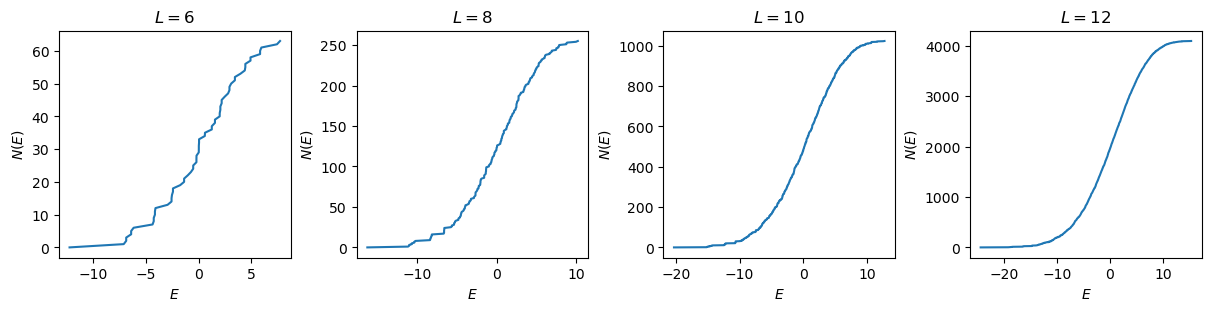

In [107]:
fig,axes = plt.subplots(1,4, figsize=(12,3), constrained_layout=True)
for ax, L in zip(axes, [6, 8, 10, 12]):
    ax.plot(spectra[L], np.arange(len(spectra[L])))
    ax.set_xlabel('$E$')
    ax.set_ylabel('$N(E)$')
    ax.set_title(f'$L={L}$')
plt.show()

Compute analytically the average energy $\overline{E} = D^{-1} \int \rho(E) E dE=D^{-1}\sum_j E_j$ and the variance $\sigma^2 = D^{-1}\int \rho(E) (E-\overline{E})^2 dE=D^{-1}\sum_j (E_j-\overline{E})^2$ for the mixed-field quantum Ising chain, and check it against the numerics.

Hint:
<span style="color:white"> Use that $\sum_j E_j=\mathrm{Tr}[H]$ and $\sum_j E_j^2=\mathrm{Tr}[H^2]$.</span>

Solution:
    \begin{equation}
\overline{E}=D^{-1}\mathrm{Tr}[H]=D^{-1}\sum_{j=0}^{L-1} (-J\mathrm{Tr}[Z_j Z_{j+1}]-g\mathrm{Tr}[X_j]-h\mathrm{Tr}[Z_j])=0.
    \end{equation}

\begin{equation}
\sigma^2= D^{-1}\mathrm{Tr}[H^2]
\end{equation}
Now we use that $D^{-1}\mathrm{Tr}[Z_jZ_k]=\delta_{jk}$, $D^{-1}\mathrm{Tr}[X_jX_k]=\delta_{jk}$, $D^{-1}\mathrm{Tr}[X_jZ_k]=0$, etc. to get:
\begin{equation}
\sigma^2= D^{-1}\mathrm{Tr}[H^2]=L(J^2+g^2+h^2)
\end{equation}

In [5]:
print('L\tMean\tMean (num)\tVariance\tVariance (num)')
print('__'*40)
for L in [6, 8, 10, 12]:
    spectrum = spectra[L]
    Var = L*(J**2+g**2+h**2)
    print(f'{L}\t0\t{np.mean(spectrum)}\t{Var}\t{np.var(spectrum)}')

L	Mean	Mean (num)	Variance	Variance (num)
________________________________________________________________________________
6	0	1.6653345369377348e-16	15.661321500000001	15.661321499999984
8	0	0.0	20.881762000000002	20.88176199999998
10	0	0.0	26.102202500000004	26.102202499999997
12	0	0.0	31.322643000000003	31.322642999999964


### Gaussian approximation

For many systems, the density of states is expected to be approximately Gaussian:
    \begin{equation}
    \rho(E) \approx D\frac{1}{\sqrt{2\pi\sigma^2}} e^{-(E-E_0)^2/2\sigma^2}
    \end{equation}
where $D=2^L$ is the Hilbert space dimension.

This implies that
\begin{equation}
\frac{N(E)}{D}\approx\int_{-\infty}^E dE' \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(E'-\overline{E})^2/2\sigma^2}=\Phi\left(\frac{E-\overline{E}}{\sigma}\right),
\end{equation}
where $\Phi(x)$ is the cumulative distribution function of the normal distribution:
\begin{equation}
\Phi(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x dt\, e^{-t^2/2}=\frac{1}{2}\left[ 1+\mathrm{erf} \left( \frac{x}{\sqrt{2}}\right) \right].
\end{equation}

Check this result, by plotting $N(E)/2^L$ vs $(E-\overline{E})/\sigma$ and comparing it with $\Phi\left(\frac{E-\overline{E}}{\sigma}\right)$ for $L=6,8,10,12$. (Use the values of $\overline{E}$ and $\sigma^2$ computed above).

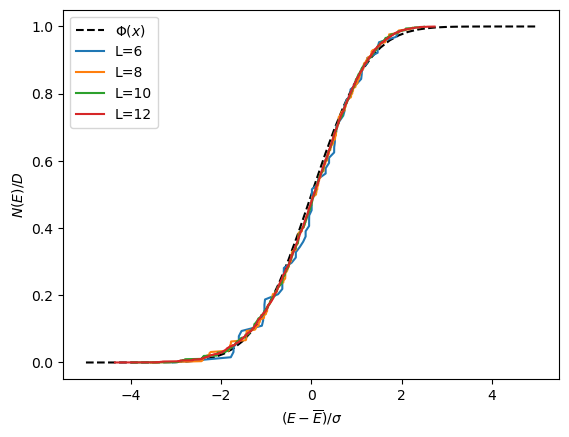

In [109]:
x = np.linspace(-5, 5)
plt.plot(x, 1/2*(1+erf(x/np.sqrt(2))), ls='--', color='k', label='$\Phi(x)$')
for L in range(6,14,2):
    spectrum = spectra[L]
    D=2**L
    Var = L*(J**2+g**2+h**2)
    
    plt.plot(spectrum/np.sqrt(Var), np.arange(D)/D, label=f'L={L}')
    
plt.legend()
plt.xlabel(r'$(E-\overline{E})/\sigma$')
plt.ylabel(r'$N(E)/D$')
plt.show()

Plot the difference between $N(E)/D$ and its Gaussian approximation $\Phi$

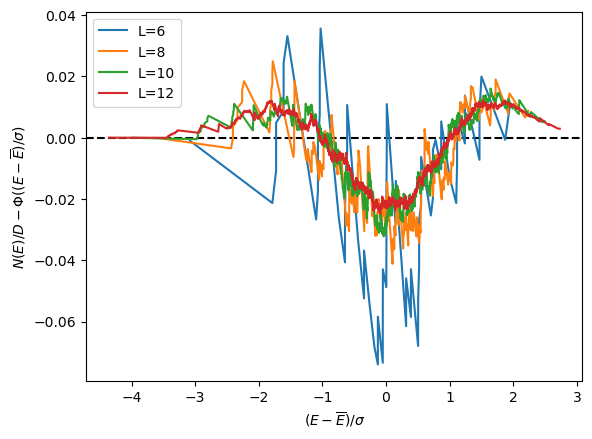

In [110]:
plt.axhline(y=0, color='k', ls='dashed')
for L in range(6,14,2):
    D=2**L
    x = spectra[L]/np.sqrt(L*(J**2+g**2+h**2))
    plt.plot(x, np.arange(D)/D-1/2*(1+erf(x/np.sqrt(2))),\
             label=f'L={L}')

plt.legend()
plt.xlabel(r'$(E-\overline{E})/\sigma$')
plt.ylabel(r'$N(E)/D-\Phi((E-\overline{E})/\sigma)$')
plt.show()

We can analyse the density of states $\rho(E)/D$ directly by plotting an histogram of the eigenvalues. Use plt.hist(..., histtype='step') and plot all the histograms of the rescaled quantity $(E-\overline E)\sigma$, with varying $L$, in the same figure. Compare it with the normal distribution.

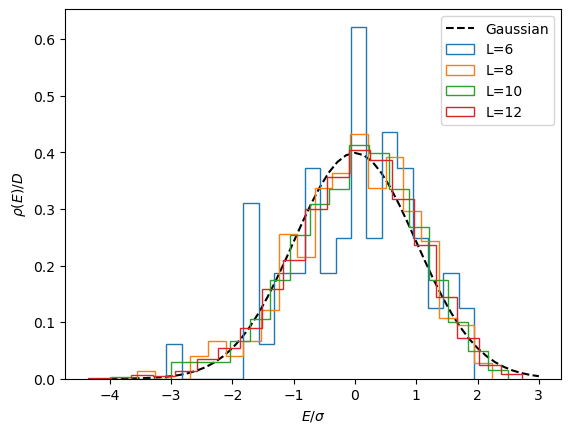

In [111]:
x = np.linspace(-4,3)
plt.plot(x, np.exp(-x**2/2)/np.sqrt(2*np.pi), color='k', ls='dashed', label='Gaussian')
for L in range(6,14,2):
    spectrum = spectra[L]
    plt.hist(spectrum/np.sqrt(L*(J**2+g**2+h**2)), histtype='step',\
             label=f'L={L}', density=True, bins=20)
plt.xlabel(r'$E/\sigma$')
plt.ylabel(r'$\rho(E)/D$')
plt.legend()
plt.show()

### Thermodynamic entropy and ensemble equivalence

The density of states $\rho(E)$ grows exponentially with the system size. It is useful to define the quantity $S(E)=\log \rho(E)$, which then depends linearly on system size (is extensive), up to logarithimic corrections. This quantity is called the thermodynamic entropy.

Compute the logarithmic corrections, assuming a Gaussian distribution for the density of states

Solution: 
\begin{equation}
S(E)= \log(\rho(E))= L\log2-\frac{(E-E_0)^2}{2\sigma^2}-\frac{1}{2}\log(2\pi\sigma^2
)
\end{equation}
The last term is the logarithmic correction

The inverse temperature is defined as $\beta(E)=\partial S/\partial E$.

Find the expression of $\beta(E)$ under the assumption of a Gaussian distribution.

Solution: $\beta(E)=-(E-\overline E)/\sigma^2$.

The above definition is derived in the context of the <em> microcanonical </em> ensemble. Now we are going to compare it with the relation between $\beta$ and $E$ according to the <em> canonical </em> ensemble. 

Use the spectra computed above to compute and plot the function
\begin{equation}
e_{canonical}(\beta)=\frac{1}{L}\frac{\mathrm{Tr}[H e^{-\beta H}]}{\mathrm{Tr}[e^{-\beta H}]}.
\end{equation}

Check that it doesn't depend on $L$, and compare it with the microcanonical prediction in the Gaussian approximation

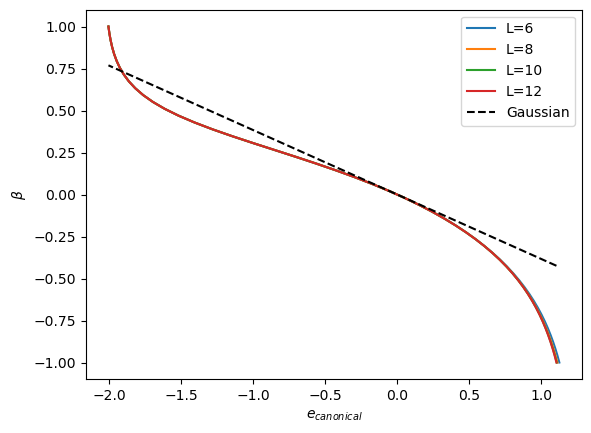

In [112]:
for L in range(6,14,2):
    spectrum = spectra[L]
    beta = np.linspace(-1,1)
    e = np.array([np.sum(spectrum*np.exp(-b*spectrum))/np.sum(np.exp(-b*spectrum)) for b in beta])/L
    plt.plot(e, beta, label=f'L={L}')
plt.plot(e, -e/(J**2+h**2+g**2), color='k', ls ='dashed', label='Gaussian')
plt.xlabel(r'$e_{canonical}$')
plt.ylabel(r'$\beta$')
plt.legend()

The results agree near the maximum of $S(E)$. To get a better agreement between the canonical and microcanonical result, we need to go beyond the Gaussian approximation.

Use the canonical result for $\beta(e)$ to compute the extensive heat capacity, $C=\beta^2/(\partial^2 S/\partial E^2)$. Plot $C/L$ as a function of $\beta$.

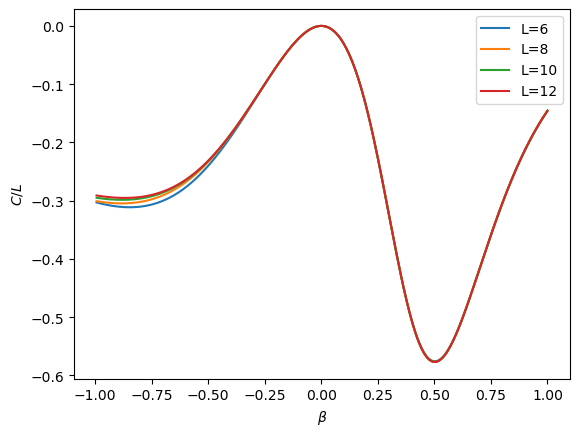

In [6]:
for L in range(6,14,2):
    spectrum = spectra[L]
    beta = np.linspace(-1,1, 300)
    e = np.array([np.sum(spectrum*np.exp(-b*spectrum))/np.sum(np.exp(-b*spectrum)) for b in beta])/L
    c = beta[1:]**2/(np.diff(beta)/np.diff(e))
    plt.plot(beta[1:], c, label=f'L={L}')
plt.ylabel(r'$C/L$')
plt.xlabel(r'$\beta$')
plt.legend()
plt.show()